In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [11]:
# sample meta-data
#this is the path file for desktop
sample_info = pd.read_csv('C:/Users/lorte/Documents/data/IPTS_27405_reduced/IPTS_27405_Sample_Info.csv')
#this is path file for laptop
#sample_info = pd.read_csv('C:/Users/lorte/Documents/data/1D/IPTS_27405_Sample_Info.csv')
path = os.getcwd()
figurepath = path + '/figures'

# helpful meta-data dictionaries
names = dict(zip(sample_info['Sample'], sample_info['Name']))
matrix = dict(zip(sample_info['Sample'], sample_info['Matrix Polymer']))
solvent_names = dict(zip(sample_info['Sample'], sample_info['Solvent']))

# target concentrations of polymer
target_CP = dict(zip(sample_info['Sample'], sample_info['Target CP Concentration']))
target_matrix = dict(zip(sample_info['Sample'], sample_info['Target Matrix Concentration']))

In [73]:
#read in the data
data_dir = 'C:/Users/lorte/Documents/data/IPTS_27405_reduced/'
files = os.listdir(data_dir)
sans_data = {}
for file in files:
    if 'merged' in file:
        key = int(file.split('_')[0][1:])
        sans_data[key] = pd.read_csv(data_dir + file, header = 2, delimiter = "\t", names = ['Q', 'I', 'DI', 'DQ'], nrows = 115)

#cutting the data 
for sample in sans_data.keys():
    sans_data[sample] = sans_data[sample][sans_data[sample].I > 0]
    sans_data[sample] = sans_data[sample][sans_data[sample].Q > 0.003]

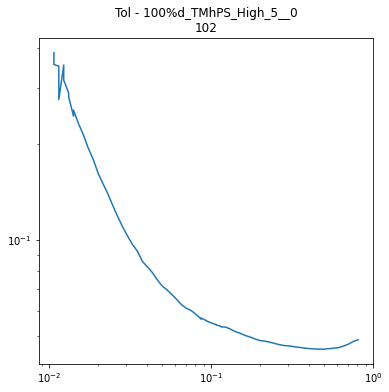

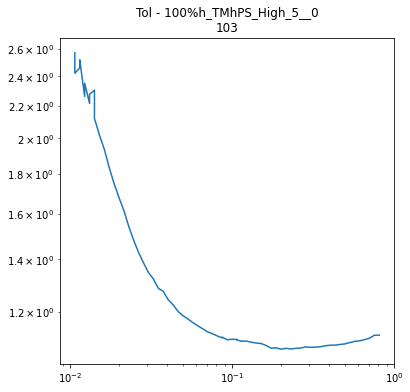

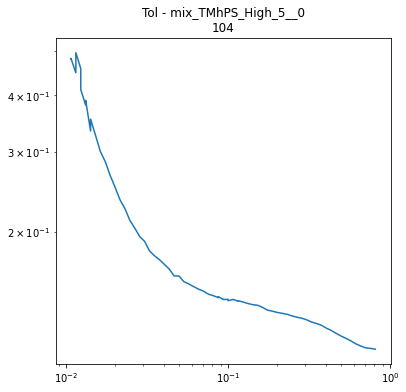

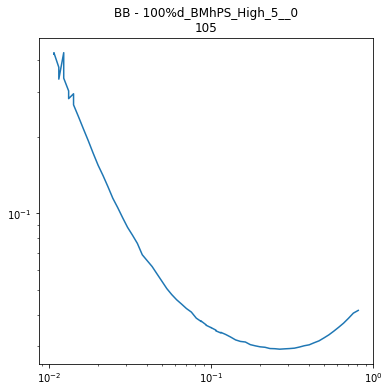

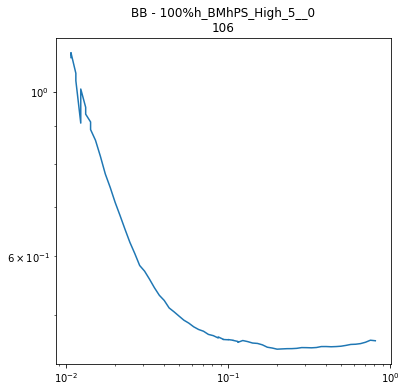

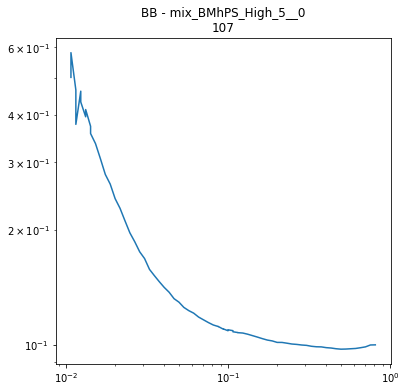

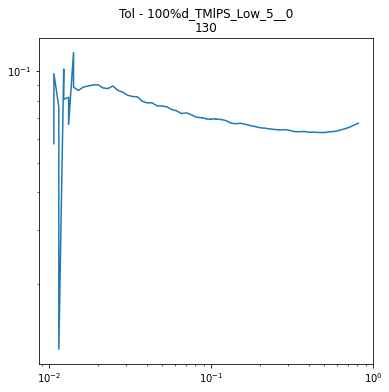

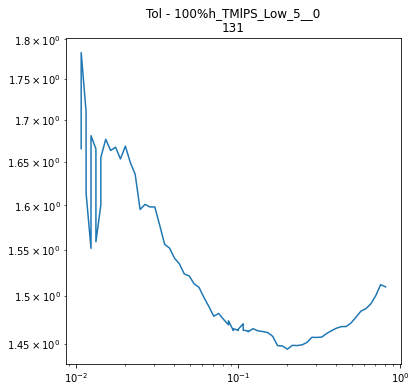

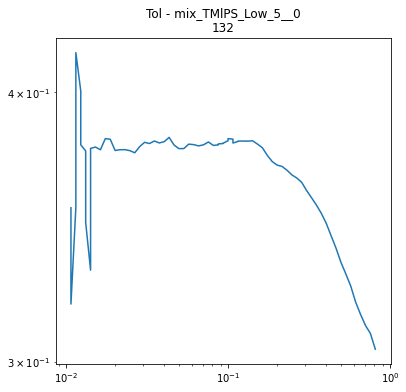

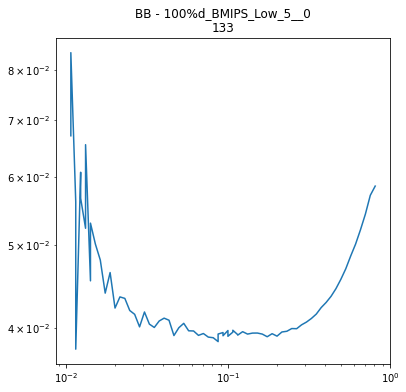

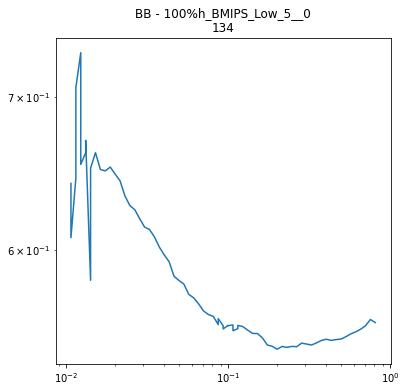

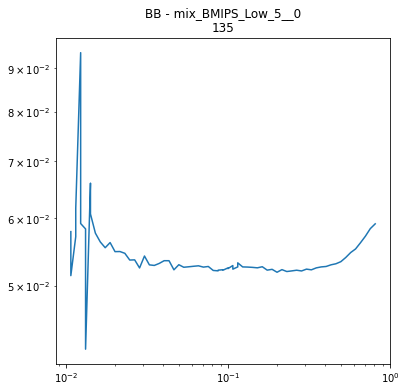

In [84]:
#cutting and replotting
sans_data_cut = {}
for sample in sans_data.keys():
    if target_CP[sample] == 0:
        sans_data_cut[sample] = sans_data[sample][sans_data[sample].Q > 0.01]
        plt.figure(figsize = (6,6))
        plt.plot(sans_data_cut[sample].Q, sans_data_cut[sample].I)
        plt.title(names[sample]+"\n" +str(sample))
        plt.xscale('log')
        plt.yscale('log')

<ipython-input-89-157bb7770f6d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sans_data_cut[sample]['I'] = sans_data_cut[sample]['I']-background


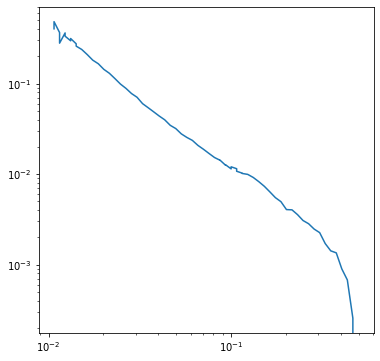

In [89]:
# sample by sample background subtraction
sample = 107

#background substraction and cut
background_loc_Q = 0.4977024
#background_loc_Q = 0.2009233
background_loc = sans_data_cut[sample][sans_data_cut[sample]['Q'] == background_loc_Q].index.values
background = sans_data_cut[sample]['I'][background_loc].values[0]

sans_data_cut[sample]['I'] = sans_data_cut[sample]['I']-background
sans_data_cut[sample] = sans_data_cut[sample][sans_data_cut[sample].Q <= background_loc_Q]

plt.figure(figsize = (6,6))
plt.plot(sans_data_cut[sample].Q, sans_data_cut[sample].I)
plt.xscale('log')
plt.yscale('log')

<ipython-input-54-970e1c43a628>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sans_data_cut[sample]['I'] = sans_data_cut[sample]['I']-background


0.0


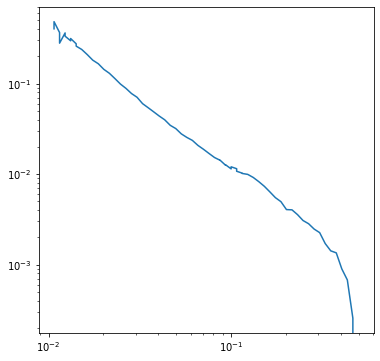

In [54]:
# sample by sample background subtraction
sample = 107
cutcounter = False
thecut = 0.02

# pre substraction cut
if cutcounter is True:
    print('we shall cut')

#background substraction and cut
background = sans_data_cut[sample]['I'].min()
background_loc = sans_data_cut[sample][sans_data_cut[sample]['I'] == background].index.values
background_loc_Q = sans_data_cut[sample]['Q'][background_loc].values[0]
sans_data_cut[sample]['I'] = sans_data_cut[sample]['I']-background
sans_data_cut[sample] = sans_data_cut[sample][sans_data_cut[sample].Q <= background_loc_Q]

plt.figure(figsize = (6,6))
plt.plot(sans_data_cut[sample].Q, sans_data_cut[sample].I)
plt.xscale('log')
plt.yscale('log')

print(sans_data_cut[sample]['I'].min())
#sans_data[sample] = sans_data[sample].reset_index()

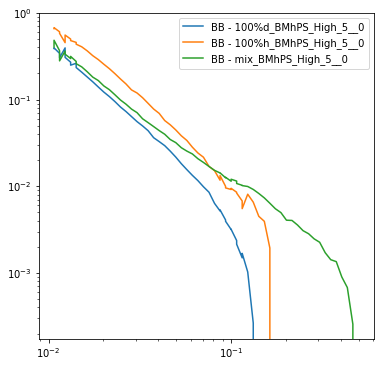

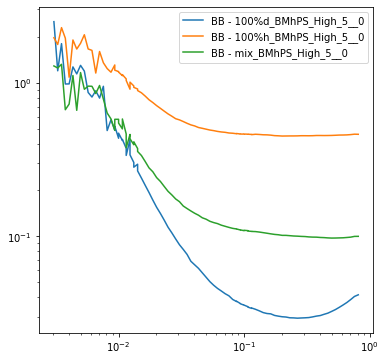

In [90]:
#samples = [102,103,104]
samples = [105,106,107]
plt.figure(figsize = (6,6))
for sample in samples:
    plt.plot(sans_data_cut[sample].Q, sans_data_cut[sample].I, label = names[sample])
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

plt.figure(figsize = (6,6))    
for sample in samples:
    plt.plot(sans_data[sample].Q, sans_data[sample].I, label = names[sample])
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

LinregressResult(slope=-0.8594490610038925, intercept=-4.914571732882618, rvalue=-0.8238058427767874, pvalue=8.042580522297487e-06, stderr=0.1393939977852113)
LinregressResult(slope=-0.4758760446467135, intercept=-1.6576364007194888, rvalue=-0.7936914488367204, pvalue=2.9580192546261715e-05, stderr=0.08596830673613873)
LinregressResult(slope=-1.2486929883574724, intercept=-6.724189630260227, rvalue=-0.8947211499100776, pvalue=1.023994176856333e-07, stderr=0.1469179753611596)


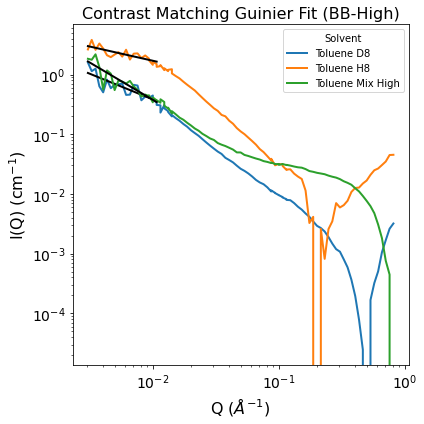

In [66]:
#deuteration fitting
plt.figure(figsize = (6,6))
samples = [102,103,104]
depth = 20
title = "Contrast Matching Guinier Fit (BB-High)"
legend_title = 'Solvent'
for sample in samples:
        xval = sans_data[sample]["Q"]
        yval = sans_data[sample]["I"]
        result = stats.linregress(np.log(xval[:depth]),np.log(yval[:depth]))
        print(result)
        xval1 = np.linspace(xval[0],xval[depth],100)
        #yval1 = xval1*result.slope + result.intercept
        yval1 = np.exp(np.log(xval1)*result.slope + result.intercept)
        plt.plot(xval,yval, label = solvent_names[sample],lw =2)
        plt.plot(xval1,yval1, color = 'k', lw = 2)
        
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Q ($\AA^{-1}$)', fontsize=16)
plt.ylabel(r'I(Q) (cm$^{-1}$)', fontsize=16)

legend = plt.legend(fontsize=10, title=legend_title)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim(1e-03, 1e11)
#plt.xlim(0.00002, 0.3)
    
plt.title(title, fontsize=16)
    
plt.tight_layout()

plt.savefig(figurepath + "/"  + title, dpi=600)

In [178]:
#integrate the linear fit and make plots for contrast matching
def log_func(x,m,b):
    return np.exp(np.log(x)*m+b)

samples = [102,103,104,105]
depth = 20
for sample in samples:
        xval = sans_data[sample]["Q"]
        yval = sans_data[sample]["I"]
        result = stats.linregress(np.log(xval[:depth]),np.log(yval[:depth]))
        xval1 = np.linspace(xval[0],1,100)
        yval1 = np.exp(np.log(xval1)*result.slope + result.intercept)
        approx = scipy.integrate.quad(log_func,xval[0],1,args = (result.slope,result.intercept))
        print(str(sample) + str(approx))

102(0.07538314368670972, 4.0818241347771495e-09)
103(0.06291287192096702, 9.9896056227689e-11)
104(0.028668034281510678, 6.493072460275719e-11)
105(0.017772423474909572, 1.2456160250864888e-11)
